In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

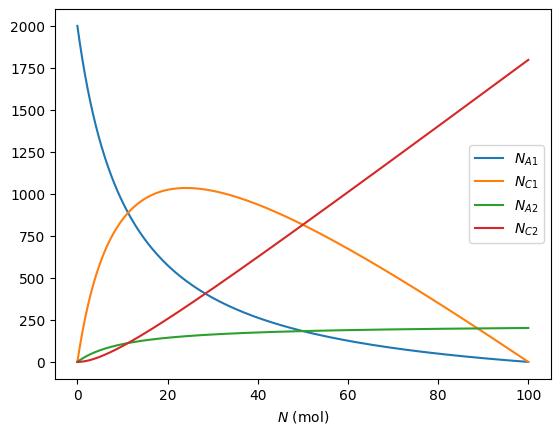

In [4]:
def ode(t, y):
    f = y*0

    N_A1 = y[0]
    N_C1 = y[1]
    N_A2 = y[2]
    N_C2 = y[3]

    k = 0.0445
    F = 10
    V_1_0 = 1000

    V_1 = V_1_0 - F * t
    V_2 = F * t

    r_A1 = k * N_A1**2 / V_1**2
        
    if V_2 == 0:
        r_A2 = 0
    else:
        r_A2 = k * N_A2**2 / V_2**2

    f[0] = -r_A1 * V_1 - F * N_A1 / V_1
    f[1] = r_A1 * V_1 - F * N_C1 / V_1
    f[2] = -r_A2 * V_2 + F * N_A1 / V_1
    f[3] = r_A2 * V_2 + F * N_C1 / V_1

    return f

V_1_0 = 1000.
C_A1_0 = 2.
N_A1_0 = V_1_0 *  C_A1_0


init_cond = [N_A1_0, 0., 0., 0.]

ode_kwargs = {
    'method': 'Radau',
    'atol': 1e-8,
    'rtol': 1e-8,
}

sol = solve_ivp(ode, [0.001, 99.999], init_cond, **ode_kwargs)

F = 10
V_1 = V_1_0 - F * sol.t
V_2 = F * sol.t

C_A1 = sol.y[0] / V_1
C_C1 = sol.y[1] / V_1
C_A2 = sol.y[2] / V_2
C_C2 = sol.y[3] / V_2


plt.plot(sol.t, sol.y[0], label=r"$N_{A1}$")
plt.plot(sol.t, sol.y[1], label=r"$N_{C1}$")
plt.plot(sol.t, sol.y[2], label=r"$N_{A2}$")
plt.plot(sol.t, sol.y[3], label=r"$N_{C2}$")
plt.xlabel(r"$t$ (min)")
plt.xlabel(r"$N$ (mol)")
plt.legend()

# plt.plot(sol.t, C_A1, label=r"$C_{A1}$")
# plt.plot(sol.t, C_C1, label=r"$C_{C1}$")
# plt.plot(sol.t, C_A2, label=r"$C_{A2}$")
# plt.plot(sol.t, C_C1, label=r"$C_{C2}$")
# plt.xlabel(r"$t$ (min)")
# plt.xlabel(r"$C$ (M)")
# plt.legend()

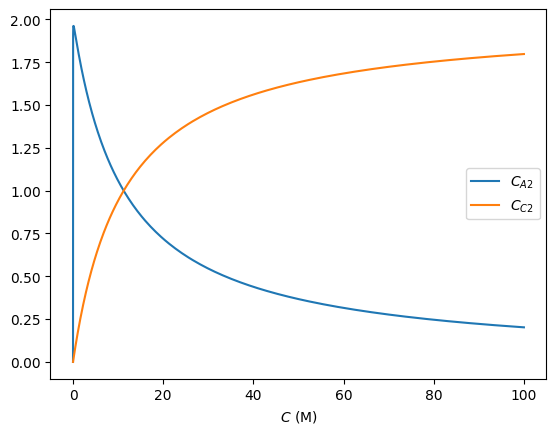

In [3]:
plt.plot(sol.t, C_A2, label=r"$C_{A2}$")
plt.plot(sol.t, C_C1, label=r"$C_{C2}$")
plt.xlabel(r"$t$ (min)")
plt.xlabel(r"$C$ (M)")
plt.legend()

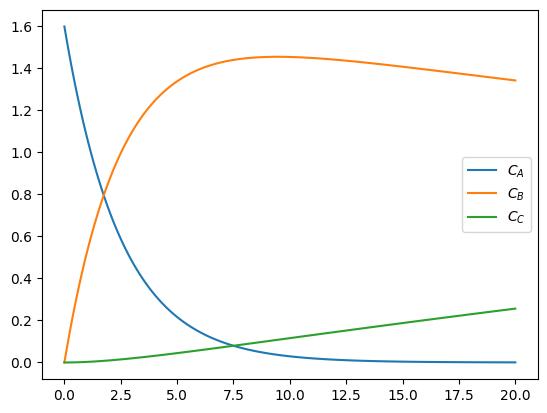

In [16]:
def ode_2(t, y):
    f = y*0

    C_A = y[0]
    C_B = y[1]
    C_C = y[2]

    k_1 = 0.4
    k_2 = 0.01
    k_b1 = 0.3
    k_b2 = 0.005

    r_1 = k_1 * C_A
    r_2 = k_2 * C_B

    f[0] = -r_1
    f[1] = r_1 - r_2
    f[2] = r_2

    return f


C_A0 = 1.6

init_cond = [C_A0, 0, 0]

sol = solve_ivp(ode_2, [0, 20], init_cond, **ode_kwargs)

plt.plot(sol.t, sol.y[0], label=r"$C_{A}$")
plt.plot(sol.t, sol.y[1], label=r"$C_{B}$")
plt.plot(sol.t, sol.y[2], label=r"$C_{C}$")
plt.legend()

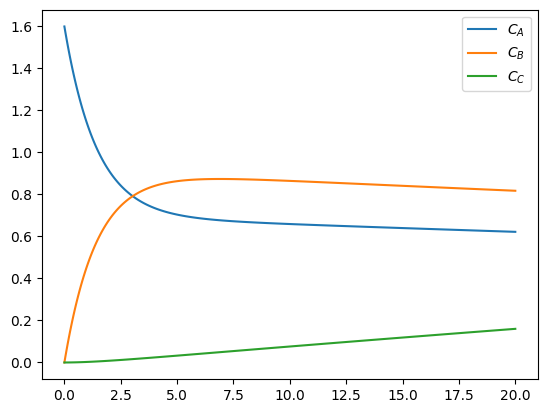

In [17]:
def ode_2(t, y):
    f = y*0

    C_A = y[0]
    C_B = y[1]
    C_C = y[2]

    k_1 = 0.4
    k_2 = 0.01
    k_b1 = 0.3
    k_b2 = 0.005

    r_1 = k_1 * C_A
    r_2 = k_2 * C_B
    r_b1 = k_b1 * C_B

    f[0] = -r_1 + r_b1
    f[1] = r_1 - r_2 - r_b1
    f[2] = r_2

    return f


C_A0 = 1.6

init_cond = [C_A0, 0, 0]

sol = solve_ivp(ode_2, [0, 20], init_cond, **ode_kwargs)

plt.plot(sol.t, sol.y[0], label=r"$C_{A}$")
plt.plot(sol.t, sol.y[1], label=r"$C_{B}$")
plt.plot(sol.t, sol.y[2], label=r"$C_{C}$")
plt.legend()

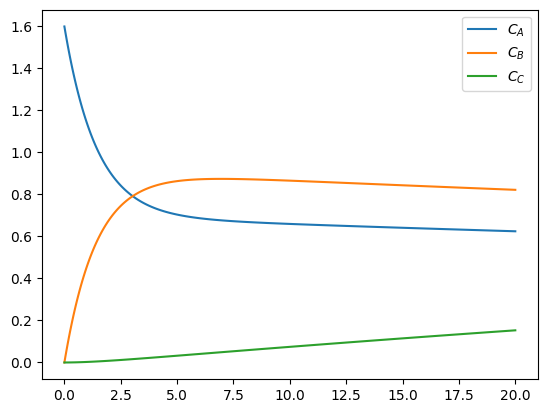

In [18]:
def ode_2(t, y):
    f = y*0

    C_A = y[0]
    C_B = y[1]
    C_C = y[2]

    k_1 = 0.4
    k_2 = 0.01
    k_b1 = 0.3
    k_b2 = 0.005

    r_1 = k_1 * C_A
    r_2 = k_2 * C_B
    r_b1 = k_b1 * C_B
    r_b2 = k_b2 * C_C

    f[0] = -r_1 + r_b1
    f[1] = r_1 - r_2 - r_b1 + r_b2
    f[2] = r_2 - r_b2

    return f


C_A0 = 1.6

init_cond = [C_A0, 0, 0]

sol = solve_ivp(ode_2, [0, 20], init_cond, **ode_kwargs)

plt.plot(sol.t, sol.y[0], label=r"$C_{A}$")
plt.plot(sol.t, sol.y[1], label=r"$C_{B}$")
plt.plot(sol.t, sol.y[2], label=r"$C_{C}$")
plt.legend()

0.040004000400040006
0.16240153544155703
98.64658107768037


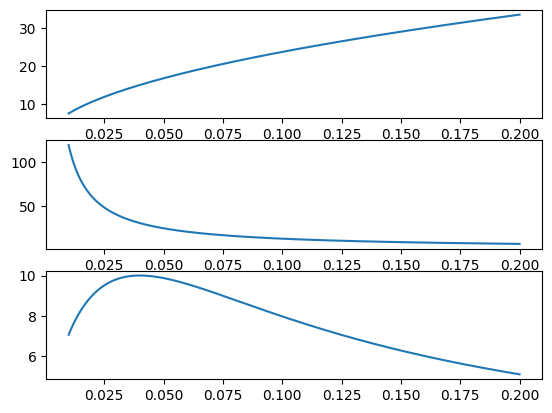

In [19]:
C_A_ran = np.linspace(0.01, 0.2, 10000)

k_1 = 0.004
k_2 = 0.3
k_3 = 0.25

SX = lambda C_A: k_2 * C_A / (k_1 * C_A**0.5)
SY = lambda C_A: k_2 * C_A / (k_3 * C_A**2)
SXY = lambda C_A: k_2 * C_A / (k_1 * np.sqrt(C_A) + k_3 * C_A**2)

fig, ax = plt.subplots(3)
ax[0].plot(C_A_ran, SX(C_A_ran))
ax[1].plot(C_A_ran, SY(C_A_ran))
ax[2].plot(C_A_ran, SXY(C_A_ran))

C_A_opt_index = np.where(SXY(C_A_ran)==SXY(C_A_ran).max())[0][0]
C_A_opt = C_A_ran[C_A_opt_index]

print(C_A_opt)

F = 10 
C_A0 = 4 / 0.08206 / (27 + 273.15)
print(C_A0)
print(F * (C_A0 - C_A_opt) / (k_1 * C_A_opt**2 + k_2 * C_A_opt + k_3 * C_A_opt**2))